# Libraries

In [181]:
import time
import math
import os
from collections import Counter
import datetime
#
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Data Analysis
import numpy as np
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from IPython.display import Image

# Visualation
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression ,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Crawllers and Scraping Funcs

In [10]:
#get temperature table from noaa website
my_url = 'https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/12/1880-2021'
option = Options()
option.headless = False
driver = webdriver.Chrome(options=option)
driver.get(my_url)
driver.maximize_window()
action = webdriver.ActionChains(driver)
search_bar = WebDriverWait(driver,
                            20).until(EC.presence_of_element_located((By.ID, 'valuesTable')))

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
div=soup.select_one("div#dataTable")
table=pd.read_html(str(div))
for i, tables in enumerate(table):
     tables.to_csv('noaaTemperature.csv')
print(table[0])

        Year Anomaly(1901-2000 Base Period)  Rank
0     202104                         0.79°C  1618
1     202103                         0.85°C  1641
2     202102                         0.65°C  1538
3     202101                         0.78°C  1614
4     202012                         0.78°C  1614
...      ...                            ...   ...
1691  188005                        -0.09°C   653
1692  188004                        -0.05°C   750
1693  188003                        -0.09°C   653
1694  188002                        -0.14°C   543
1695  188001                        -0.06°C   731

[1696 rows x 3 columns]


In [9]:
#get jsons from global-warming.org
url = 'https://global-warming.org'
tableUrl ='https://www.ncdc.noaa.gov/cag/'
HEADERS = {'user-agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5)'
                           'AppleWebKit/537.36 (KHTML, like Gecko)'
                           'Chrome/45.0.2454.101 Safari/537.36'),
                           'referer': 'https://global-warming.org/'}

soup = requests.get(url)
temp =BeautifulSoup(soup.content, 'html.parser')
hrefs = temp.find_all("div", class_="content api-content")
for href in hrefs:
    print(href.b.contents[0].strip())
    response = requests.get(href.b.contents[0].strip(),headers=HEADERS)
    jsonurl = response.json()
    df = pd.json_normalize(jsonurl[list(response.json().keys())[-1]])
    df.to_csv(href.b.contents[0].strip().split("/")[-1].split("-")[0]+".csv",index=False)
    print(href.b.contents[0].strip().split("/")[-1].split("-")[0]+".csv")

https://global-warming.org/api/temperature-api
temperature.csv
https://global-warming.org/api/co2-api
co2.csv
https://global-warming.org/api/methane-api
methane.csv
https://global-warming.org/api/nitrous-oxide-api
nitrous.csv
https://global-warming.org/api/arctic-api
arctic.csv


In [71]:
temp = pd.read_csv(r'noaaTemperature.csv')
co2 = pd.read_csv(r'co2.csv')
methane = pd.read_csv(r'methane.csv')
nitrous = pd.read_csv(r'nitrous.csv')
arctic = pd.read_csv(r'arctic.csv')

In [72]:
temp

Unnamed: 0    Year Anomaly(1901-2000 Base Period)  Rank
0              0  202104                         0.79°C  1618
1              1  202103                         0.85°C  1641
2              2  202102                         0.65°C  1538
3              3  202101                         0.78°C  1614
4              4  202012                         0.78°C  1614
...          ...     ...                            ...   ...
1691        1691  188005                        -0.09°C   653
1692        1692  188004                        -0.05°C   750
1693        1693  188003                        -0.09°C   653
1694        1694  188002                        -0.14°C   543
1695        1695  188001                        -0.06°C   731

[1696 rows x 4 columns]

In [73]:
co2

year  month  day   cycle   trend
0     2011      1    1  391.25  389.74
1     2011      1    2  391.29  389.75
2     2011      1    3  391.32  389.76
3     2011      1    4  391.36  389.76
4     2011      1    5  391.39  389.77
...    ...    ...  ...     ...     ...
3783  2021      5   11  416.74  414.65
3784  2021      5   12  416.74  414.66
3785  2021      5   13  416.74  414.67
3786  2021      5   14  416.74  414.67
3787  2021      5   15  416.74  414.68

[3788 rows x 5 columns]

In [74]:
methane

date  average   trend  averageUnc  trendUnc
0    1983.70   1625.4  1634.3         2.4       1.5
1    1983.80   1627.4  1635.0         2.9       1.4
2    1983.90   1638.1  1635.7         2.2       1.3
3    1983.10   1644.7  1636.4         1.4       1.3
4    1983.11   1642.3  1637.2         0.8       1.2
..       ...      ...     ...         ...       ...
446  2020.90   1885.1  1883.3        -9.9      -9.9
447  2020.10   1890.8  1884.6        -9.9      -9.9
448  2020.11   1892.1  1885.8        -9.9      -9.9
449  2020.12   1893.0  1886.9        -9.9      -9.9
450  2021.10   1893.4  1887.9        -9.9      -9.9

[451 rows x 5 columns]

In [75]:
nitrous

date  average  trend  averageUnc  trendUnc
0    2001.30    316.2  316.2         0.2       0.1
1    2001.40    316.1  316.2         0.1       0.1
2    2001.50    316.1  316.3         0.1       0.1
3    2001.60    316.2  316.3         0.1       0.1
4    2001.70    316.2  316.4         0.1       0.1
..       ...      ...    ...         ...       ...
234  2020.90    333.3  333.3        -9.9      -9.9
235  2020.10    333.4  333.4        -9.9      -9.9
236  2020.11    333.6  333.5        -9.9      -9.9
237  2020.12    333.8  333.7        -9.9      -9.9
238  2021.10    333.9  333.8        -9.9      -9.9

[239 rows x 5 columns]

In [76]:
arctic

year  extent  area
0   1979    7.05  4.58
1   1980    7.67  4.87
2   1981    7.14  4.44
3   1982    7.30  4.43
4   1983    7.39  4.70
5   1984    6.81  4.11
6   1985    6.70  4.23
7   1986    7.41  4.72
8   1987    7.28  5.64
9   1988    7.37  5.36
10  1989    7.01  4.86
11  1990    6.14  4.55
12  1991    6.47  4.51
13  1992    7.47  5.43
14  1993    6.40  4.58
15  1994    7.14  5.13
16  1995    6.08  4.43
17  1996    7.58  5.62
18  1997    6.69  4.89
19  1998    6.54  4.30
20  1999    6.12  4.29
21  2000    6.25  4.35
22  2001    6.73  4.59
23  2002    5.83  4.03
24  2003    6.12  4.05
25  2004    5.98  4.39
26  2005    5.50  4.07
27  2006    5.86  4.01
28  2007    4.27  2.82
29  2008    4.69  3.26
30  2009    5.26  3.76
31  2010    4.87  3.34
32  2011    4.56  3.21
33  2012    3.57  2.41
34  2013    5.21  3.78
35  2014    5.22  3.74
36  2015    4.62  3.42
37  2016    4.53  2.91
38  2017    4.82  3.35
39  2018    4.79  3.35
40  2019    4.32  3.13

# Clean the data & Preper the data

In [77]:
#delete °C fro teperature column
temp['Anomaly(1901-2000 Base Period)'] = temp['Anomaly(1901-2000 Base Period)'].str.replace(r'°C$', '')

#calc mean of month from co2 df
group_data = co2.groupby(['year','month']).sum()
co2['co2']=co2.groupby(['year','month']).cycle.transform('mean')
co2.drop_duplicates(subset=['co2'],inplace=True,ignore_index=True)
co2.sort_values(by=['year', 'month'])
co2 = co2.drop(columns=['day','cycle','trend'])
data =pd.DataFrame()

#202104 - year -2021 , month - 04
temp['year'] = (temp['Year']/100).astype(int)
temp['month'] = (temp['Year']%100).astype(int)
#change col name
temp['temperature'] = (temp['Anomaly(1901-2000 Base Period)']).astype(float)
temp = temp.drop(columns=['Year','Rank','Anomaly(1901-2000 Base Period)'])


#methane data cleanind
methane = pd.read_csv(r'methane.csv')
methane['year'] = methane['date'].astype(int)
methane['month'] = np.where((np.modf(methane['date'])[0]>0.10)&(np.modf(methane['date'])[0]<0.13),(methane['date']*100%100).astype(int),(methane['date']*10%10).astype(int))
methane['month'] = methane['month'].replace(1,np.nan)
methane['ch4'] = methane['average']
methane = methane.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#nitrous cleaning data
nitrous = pd.read_csv(r'nitrous.csv')
nitrous['year'] = nitrous['date'].astype(int)
nitrous['month'] = np.where((np.modf(nitrous['date'])[0]>0.10)&(np.modf(nitrous['date'])[0]<0.13),(nitrous['date']*100%100).astype(int),(nitrous['date']*10%10).astype(int))
nitrous['month'] = nitrous['month'].replace(1,np.nan)
nitrous['n2o'] = nitrous['average']
nitrous = nitrous.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#merge dfs
data = pd.merge(temp,co2,on=['year','month'],how="left")
data = pd.merge(data,methane,on=['year','month'],how="left")
data = pd.merge(data,nitrous,on=['year','month'],how="left")
data = data[['year','month','temperature','co2','ch4','n2o']]
data

year  month  temperature         co2     ch4    n2o
0     2021      4         0.79  416.435000     NaN    NaN
1     2021      3         0.85  416.117742     NaN    NaN
2     2021      2         0.65  415.695000     NaN    NaN
3     2021      1         0.78  415.020000     NaN    NaN
4     2020     12         0.78  414.470645  1893.0  333.8
...    ...    ...          ...         ...     ...    ...
1691  1880      5        -0.09         NaN     NaN    NaN
1692  1880      4        -0.05         NaN     NaN    NaN
1693  1880      3        -0.09         NaN     NaN    NaN
1694  1880      2        -0.14         NaN     NaN    NaN
1695  1880      1        -0.06         NaN     NaN    NaN

[1696 rows x 6 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1696 non-null   int32  
 1   month        1696 non-null   int32  
 2   temperature  1696 non-null   float64
 3   co2          124 non-null    float64
 4   ch4          375 non-null    float64
 5   n2o          199 non-null    float64
dtypes: float64(4), int32(2)
memory usage: 79.5 KB


### Not enough data, after clearing NAN and duplicates there will be even fewer lines, so we need more data, at climatelevels.org we have an annual history of 1000 years

# add more data

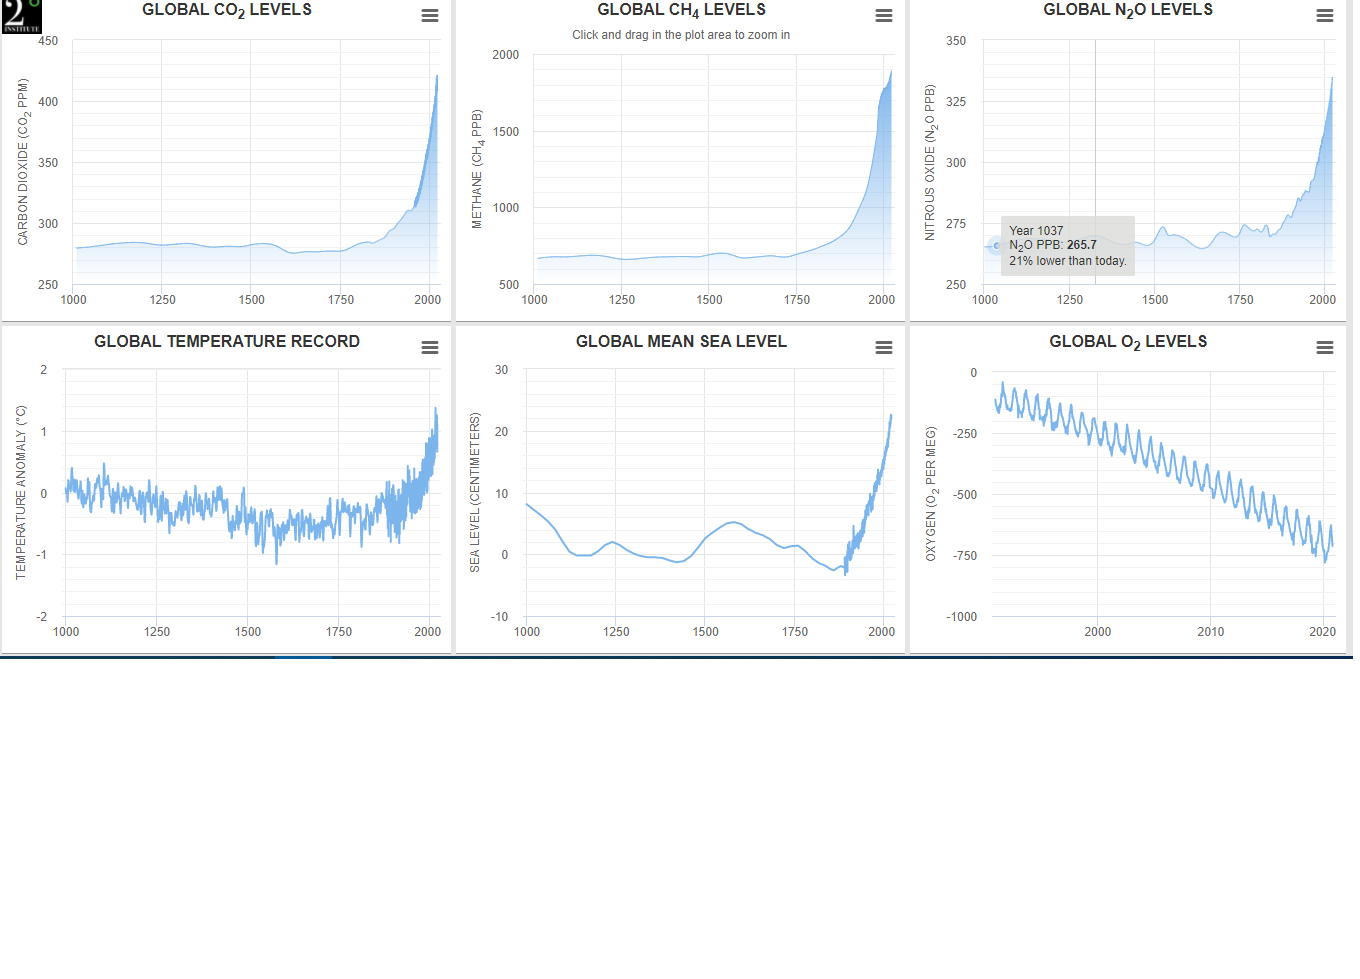

In [78]:
#https://www.climatelevels.org/?pid=2degreesinstitute&theme=grid-light
Image("image.png")

In [79]:
#links 
links = {'https://www.co2levels.org/':'globalCo2','https://www.oxygenlevels.org/':'globalO2',
         'https://www.n2olevels.org/':'globalN2o',
         'https://www.temperaturerecord.org/':'globalTemperatura',
         'https://www.methanelevels.org/':'globalMethane','https://www.sealevels.org/':'globalSealevel'}

In [ ]:
def get_data(links):
    for key,value in links:
        option = Options()
        option.headless = False
        driver = webdriver.Chrome(options=option)
        driver.get(key)
        driver.maximize_window()
        action = webdriver.ActionChains(driver)
        chart_search = WebDriverWait(driver,
                                   20).until(EC.presence_of_element_located((By.CLASS_NAME, 'highcharts-series-group')))
        search_button = driver.find_elements_by_css_selector('[onclick^=\"purecookieDismiss();\"]')[0]
        search_button.click()
        chart = driver.find_elements_by_css_selector('[fill^=\"none\"]')[0]
        action.move_to_element_with_offset(chart_search, chart_search.size['width'],0).perform()
        df = pd.DataFrame(columns=["year",value])
        pace=0
        while True:
            action.move_to_element_with_offset(chart_search, chart_search.size['width']+pace,0).perform()
            chart_text = driver.find_elements_by_css_selector('[style^=\"font-family:\"]')[3].text
            if chart_text!="":
                data = chart_text.split("\n")
                df=df.append({"year":data[0],value:data[1].split(":")[1]},ignore_index=True)
                pace =pace -1
            elif chart_text=="":
                break
        driver.quit()
        df.to_csv(value+".csv")

In [80]:
#set monthly data df
years = range(2021,999,-1)
months = range(12,0,-1)
df = pd.DataFrame(columns=["year","month"])
for year in years:
    for month in months:
        df =df.append({"year":year,"month":month},ignore_index=True)
df.head(20)

year month
0   2021    12
1   2021    11
2   2021    10
3   2021     9
4   2021     8
5   2021     7
6   2021     6
7   2021     5
8   2021     4
9   2021     3
10  2021     2
11  2021     1
12  2020    12
13  2020    11
14  2020    10
15  2020     9
16  2020     8
17  2020     7
18  2020     6
19  2020     5

In [81]:
def cleanData(data,name,pdToConcat):
    df = pd.read_csv(data)
    df=df.drop_duplicates(subset=['year'])
    if name =='methane':
        name1 = 'ch4'
    else:
        name1 = name
    try:
        df[name] = df[name].str.replace(r'°C$', '')
    except:
        print("not avalble")
    df['year'] = df['year'].str.replace(r'Year', 'May 12, ')
    df['year'] = df['year'].str.replace(r'-', ' 12, ')
    df_clean = pd.DataFrame()
    for index, row in df.iterrows():
        try:
            datee = datetime.datetime.strptime(row["year"], "%b %d, %y")
            df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
        except:
            try:
                datee = datetime.datetime.strptime(row["year"], "%B %d, %Y")
                df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
            except:
                try:
                    datee = datetime.datetime.strptime(row["year"], "%B %Y")
                    df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
                except:
                    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
                    df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
    df_clean['year'] = df_clean['year'].astype(int)
    df_clean['month'] = df_clean['month'].astype(int)
    df_clean = df_clean[['year','month',name1]]
    concatdata = pd.concat([pdToConcat,df_clean],ignore_index =True,sort=False)
    return concatdata

In [82]:
Temp_data = cleanData("globalTemperatura.csv",'temperature',temp)
Co2_data = cleanData("globalCo2.csv",'co2',co2)
Methane_data =cleanData("globalMethane.csv",'methane',methane)
Nitrous_data = cleanData("globalN2o.csv","n2o",nitrous)

not avalble
not avalble
not avalble


In [83]:
merged_data = pd.merge(df,Temp_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Co2_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Methane_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Nitrous_data,on=['year','month'],how="left")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12467
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12468 non-null  object 
 1   month        12468 non-null  object 
 2   Unnamed: 0   1768 non-null   float64
 3   temperature  2780 non-null   object 
 4   co2          549 non-null    float64
 5   ch4          723 non-null    float64
 6   n2o          1334 non-null   float64
dtypes: float64(4), object(3)
memory usage: 779.2+ KB


In [84]:
#replace Nana with linear methods
merged_data = merged_data[['year','month','temperature','co2','ch4','n2o']]
merged_data['temperature'] =merged_data['temperature'].astype(float)

interpolate_data = merged_data.copy()
interpolate_data['temperature']=interpolate_data['temperature'].interpolate(method='linear',limit_direction='both')
interpolate_data['ch4'] =interpolate_data['ch4'].interpolate(method='pchip',limit_direction='both')
interpolate_data = interpolate_data.interpolate(method="spline", order=2)
interpolate_data= interpolate_data.iloc[7:]
interpolate_data = interpolate_data.drop_duplicates(subset=['year','month'],ignore_index=True)
interpolate_data = interpolate_data.dropna()
interpolate_data[['temperature','co2','ch4','n2o']] = interpolate_data[['temperature','co2','ch4','n2o']].round(2)
interpolate_data

year month  temperature     co2      ch4     n2o
2      2021     3         0.85  416.12  1889.69  334.85
3      2021     2         0.65  415.70  1894.23  333.95
4      2021     1         0.78  415.02  1893.92  333.90
5      2020    12         0.78  414.47  1893.00  333.80
6      2020    11         0.95  413.70  1892.10  333.60
...     ...   ...          ...     ...      ...     ...
12252  1000     5         0.04  277.95   662.00  265.30
12253  1000     4         0.05  277.95   661.97  265.34
12254  1000     3         0.06  277.94   661.94  265.34
12255  1000     2         0.06  277.94   661.91  265.34
12256  1000     1         0.07  277.93   661.88  265.34

[12255 rows x 6 columns]

In [85]:
interpolate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12255 entries, 2 to 12256
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12255 non-null  object 
 1   month        12255 non-null  object 
 2   temperature  12255 non-null  float64
 3   co2          12255 non-null  float64
 4   ch4          12255 non-null  float64
 5   n2o          12255 non-null  float64
dtypes: float64(4), object(2)
memory usage: 670.2+ KB


In [87]:
interpolate_data = interpolate_data.drop_duplicates(ignore_index=True)

interpolate_data.describe()

temperature           co2           ch4           n2o
count  12255.000000  12255.000000  12255.000000  12255.000000
mean      -0.235769    287.338368    765.329668    272.218491
std        0.296723     20.078365    236.245150     10.891284
min       -1.160000    275.260000    660.000000    264.500000
25%       -0.450000    280.490000    676.040000    267.360000
50%       -0.250000    282.410000    680.420000    268.520000
75%       -0.060000    283.390000    704.325000    271.880000
max        1.310000    416.120000   1894.230000    334.850000

# Visualation

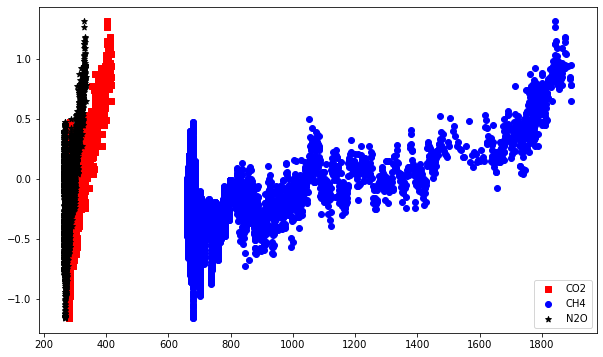

In [88]:
interpolate_data
plt.scatter(x=interpolate_data['co2'],y=interpolate_data['temperature'],c='r',marker='s',label='CO2')
plt.scatter(x=interpolate_data['ch4'],y=interpolate_data['temperature'],c='b',marker='o',label='CH4')
plt.scatter(x=interpolate_data['n2o'],y=interpolate_data['temperature'],c='k',marker='*',label='N2O')
plt.legend(numpoints=1,loc=4)
plt.show()

<AxesSubplot:>

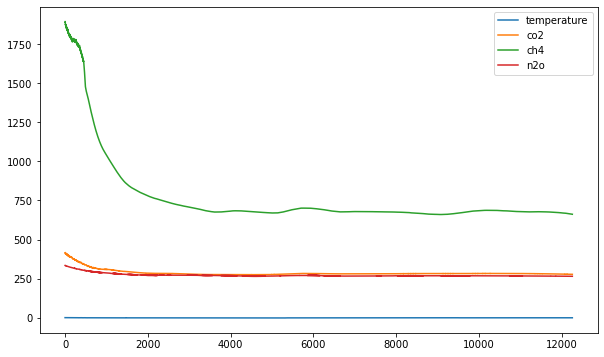

In [89]:
interpolate_data[['temperature','co2','ch4','n2o']].plot()

<AxesSubplot:xlabel='year', ylabel='temperature'>

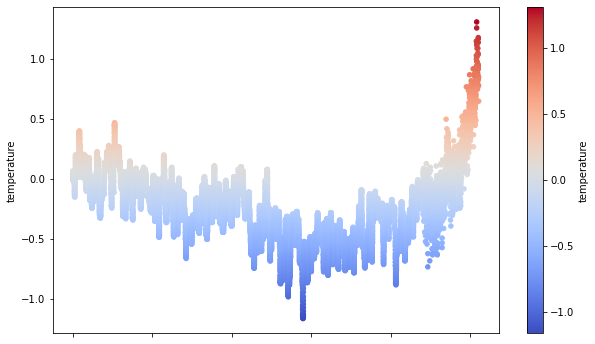

In [90]:
df_temp = interpolate_data[['year','temperature']]
df_temp.plot.scatter(x='year',y='temperature',c='temperature',cmap='coolwarm')

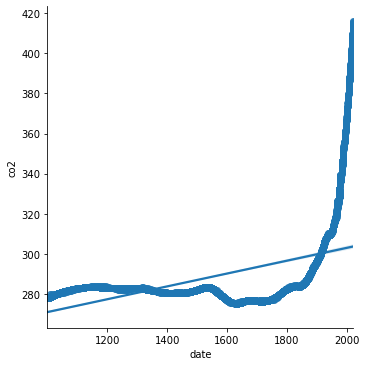

In [91]:
new_df = interpolate_data.copy()
new_df['date'] = new_df['year']+new_df['month']/100
new_df['date']=new_df['date'].astype(float)
sns.lmplot(x='date',y ='co2',data=new_df)

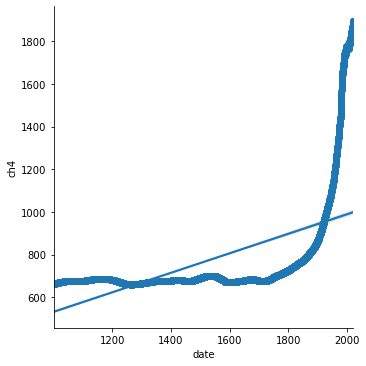

In [92]:
sns.lmplot(x='date',y ='ch4',data=new_df)

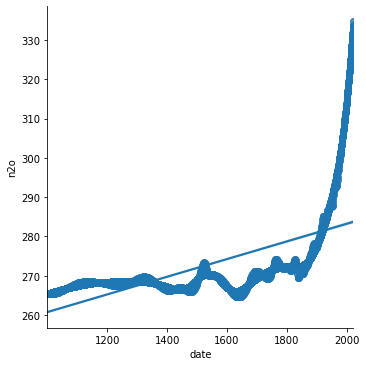

In [93]:
sns.lmplot(x='date',y ='n2o',data=new_df)

### We see the growth from 1800

<AxesSubplot:>

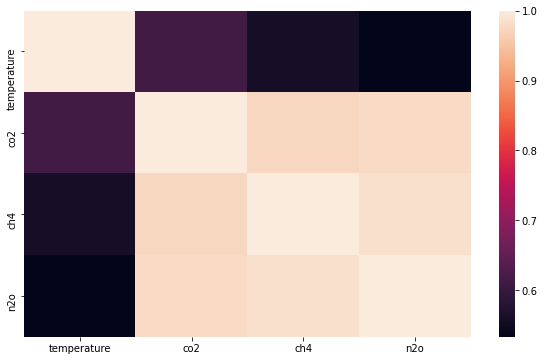

In [94]:
sns.heatmap(interpolate_data.corr())

# Machine Learning

In [98]:
ml_df = new_df[['date','temperature','co2','ch4','n2o']]
ml_df

date  temperature     co2      ch4     n2o
0      2021.03         0.85  416.12  1889.69  334.85
1      2021.02         0.65  415.70  1894.23  333.95
2      2021.01         0.78  415.02  1893.92  333.90
3      2020.12         0.78  414.47  1893.00  333.80
4      2020.11         0.95  413.70  1892.10  333.60
...        ...          ...     ...      ...     ...
12250  1000.05         0.04  277.95   662.00  265.30
12251  1000.04         0.05  277.95   661.97  265.34
12252  1000.03         0.06  277.94   661.94  265.34
12253  1000.02         0.06  277.94   661.91  265.34
12254  1000.01         0.07  277.93   661.88  265.34

[12255 rows x 5 columns]

In [136]:
# Lists

category = ['Intercept','R2','Mean Absolute Error','Mean Squared Error','Root Mean Squared']
machine= []
Intercept = []
R2 = []
Absolute_err = []
Squared_err = []
Mean_sq = []

In [170]:
def add_results(clf,name,X,y):
    Intercept.append(round(clf.score(X,y), 5))
    R2.append(round(metrics.r2_score(y,clf.predict(X)), 5))
    Absolute_err.append(round(metrics.mean_absolute_error(y,clf.predict(X)), 5))
    Squared_err.append(round(metrics.mean_squared_error(y,clf.predict(X)), 5))
    Mean_sq.append(round(np.sqrt(metrics.mean_squared_error(y,clf.predict(X))), 5))
    machine.append(name)
def print_resulrs(clf,X,y):
    print("R2:",clf.score(X,y))
    print("R2:",metrics.r2_score(y,clf.predict(X)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y,clf.predict(X)))
    print('Mean Squared Error:', metrics.mean_squared_error(y,clf.predict(X)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,clf.predict(X))))
    
    
def find_best_random_forest_num_estimators(X_train, y_train):
    parameters = {'n_estimators':[11,20,51,71] }
    rf = RandomForestRegressor()
    clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.r2_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_num_estimators = clf.best_params_['n_estimators']
    return best_num_estimators


def Random_Forest(X_train, y_train):
    best_num_estimators = find_best_random_forest_num_estimators(X_train, y_train)
    params = {'num_estimator':best_num_estimators}
    clf = RandomForestRegressor(n_estimators=params['num_estimator'], random_state=0)
    print("Best num estimator is:",best_num_estimators,"\n")
    return clf
    
    
    
def plot_results(name,machine):
    x = np.arange(len(machine))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    rects1 = ax.bar(x +0.0, Intercept, width, label='Intercept',color='b')
    rects2 = ax.bar(x + 0.15, R2, width, label='R2',color='g')
    rects3 = ax.bar(x + 0.30, Absolute_err, width, label='Mean Absolute Error',color='r')
    rects4 = ax.bar(x + 0.45, Squared_err, width, label='Mean Squared Error',color='purple')
    rects5 = ax.bar(x + 0.60, Mean_sq, width, label='Root Mean Squared',color='lavender')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(x)
    ax.set_xticklabels(machine)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)

# linear regression

             temperature       co2       ch4       n2o
temperature     1.000000  0.614903  0.559779  0.533528
co2             0.614903  1.000000  0.976280  0.978761
ch4             0.559779  0.976280  1.000000  0.986123
n2o             0.533528  0.978761  0.986123  1.000000


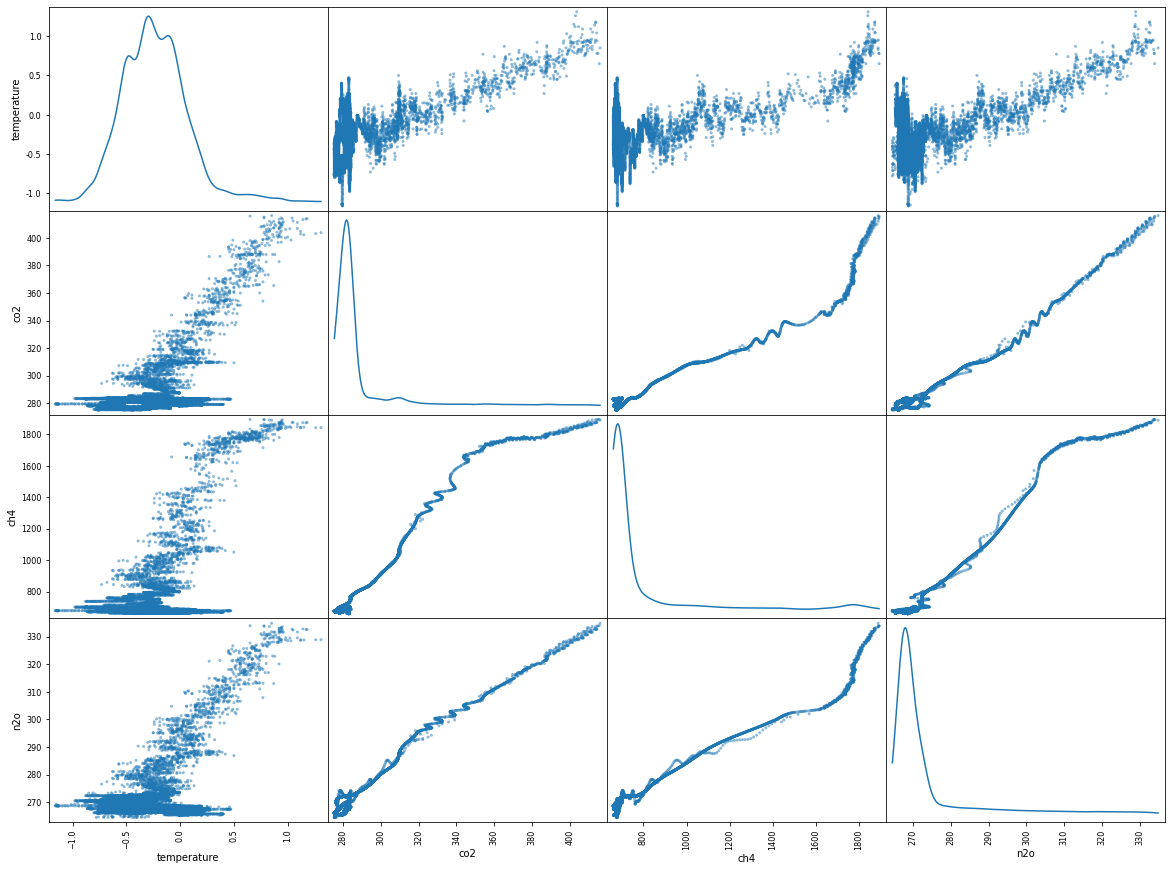

In [138]:

print(ml_df[['temperature','co2','ch4','n2o']].corr())
pd.plotting.scatter_matrix(ml_df[['temperature','co2','ch4','n2o']], figsize=(20, 15), diagonal='kde')
plt.show()

In [139]:
#Split to train and test
X = ml_df[['date','co2','ch4','n2o']].values.reshape(ml_df[['date','co2','ch4','n2o']].shape[0],4)
y = ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)

Slope: [[-0.00067801  0.00111825  0.00055907  0.01173684]]
Intercept: [-3.15602205]


In [140]:
print_resulrs(LR_clf,X,y)

R2: 0.6076851537909669
R2: 0.6076851537909669
Mean Absolute Error: 0.1474359127845841
Mean Squared Error: 0.03453828906945884
Root Mean Squared Error: 0.18584479833844916


In [141]:
add_results(LR_clf,"all",X,y)

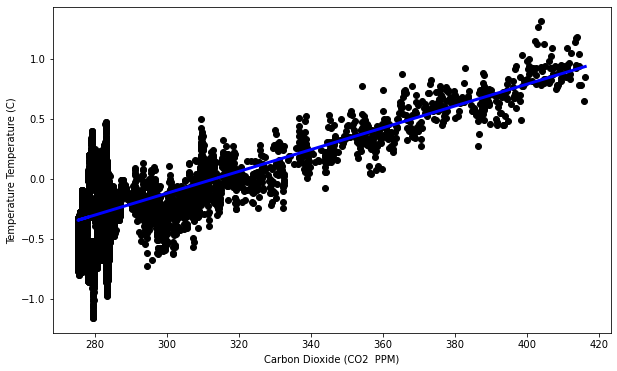

Slope: [[0.00908717]]
R2: 0.3781053955408089
R2: 0.3781053955408089
Mean Absolute Error: 0.18699599726420757
Mean Squared Error: 0.05474984142737178
Root Mean Squared Error: 0.23398684028673872


In [142]:
X = ml_df[['co2']].values.reshape(ml_df[['co2']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"co2",X,y)

plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Carbon Dioxide (CO2  PPM)')
plt.ylabel('Temperature Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

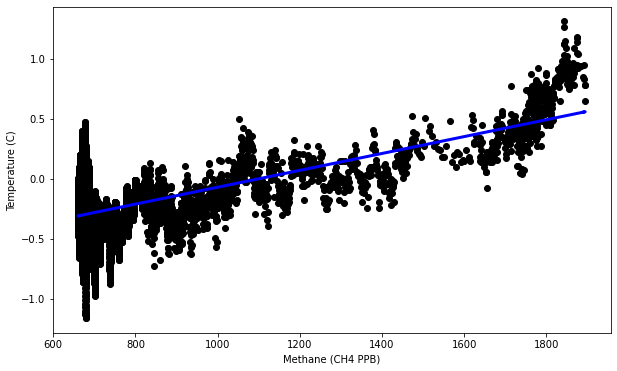

Slope: [[0.00070308]]
R2: 0.31335224394327144
R2: 0.31335224394327144
Mean Absolute Error: 0.19901276875919158
Mean Squared Error: 0.06045052568555203
Root Mean Squared Error: 0.2458668861102528


In [143]:
X = ml_df[['ch4']].values.reshape(ml_df[['ch4']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"ch4",X,y)
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Methane (CH4 PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

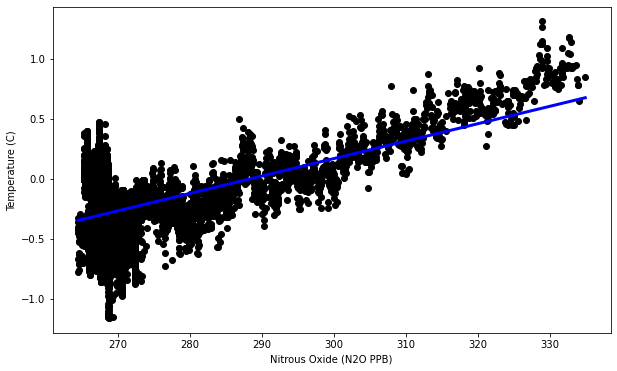

Slope: [[0.01453547]]
R2: 0.28465234363341696
R2: 0.28465234363341696
Mean Absolute Error: 0.20326531831211178
Mean Squared Error: 0.06297718370715097
Root Mean Squared Error: 0.2509525527010055


In [144]:
X = ml_df[['n2o']].values.reshape(ml_df[['n2o']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"n20",X,y)
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Nitrous Oxide (N2O PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

# results

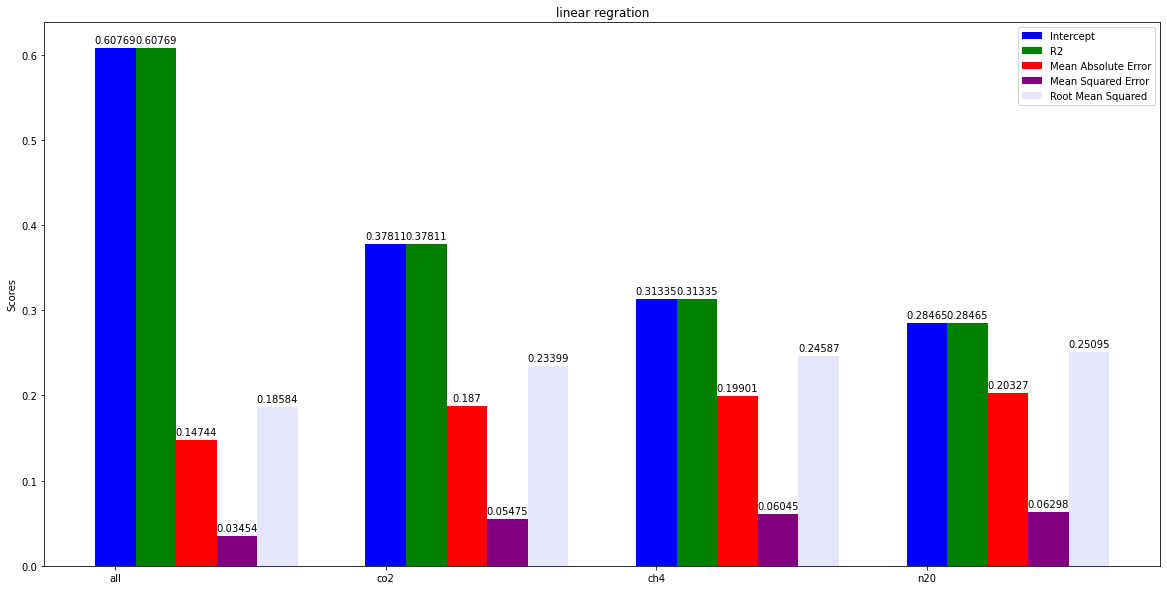

In [161]:
#plt.bar(machine,test)
plot_results('linear regration',machine)

# Random Fores

In [178]:
#lists
machine= []
Intercept = []
R2 = []
Absolute_err = []
Squared_err = []
Mean_sq = []
#add best resalt for linear test
X = ml_df[['date','co2','ch4','n2o']].values.reshape(ml_df[['date','co2','ch4','n2o']].shape[0],4)
y = ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
add_results(LR_clf,"Linear Regration",X,y)

In [173]:
X = ml_df[['date','co2','ch4','n2o']]
y = ml_df[['temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = Random_Forest(X_train, y_train)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

Best num estimator is: 71 



array([-0.51      , -0.18014085, -0.34647887, ..., -0.41492958,
       -0.36985915,  0.05732394])

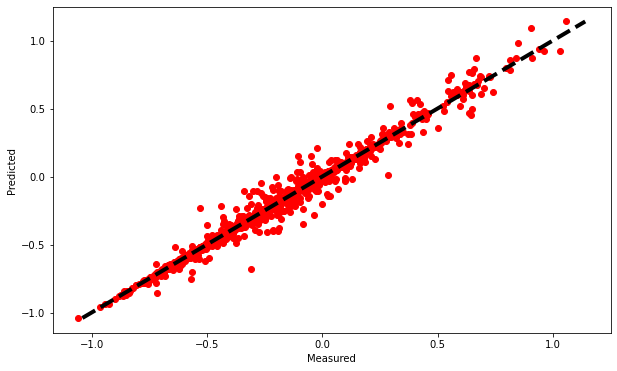

R2: 0.9977969800852656
R2: 0.9977969800852656
Mean Absolute Error: 0.0059050344498652605
Mean Squared Error: 0.00019633787115380506
Root Mean Squared Error: 0.01401206163110215


In [179]:
add_results(regressor,"Random Fores",X_train, y_train)
plt.scatter(y_pred, y_test,  color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
print_resulrs(regressor,X_train, y_train)

# SVR

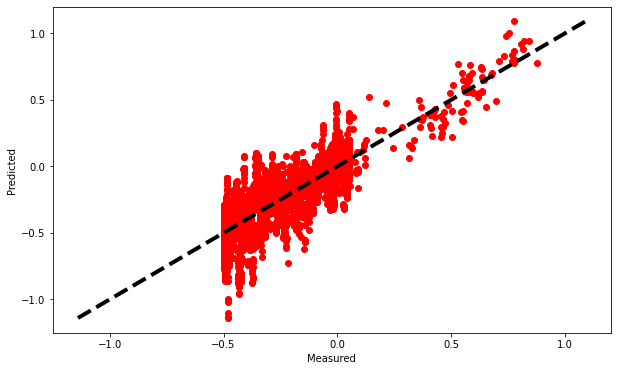

R2: 0.6898719689608905
R2: 0.6898719689608905
Mean Absolute Error: 0.13149894536566048
Mean Squared Error: 0.027607920357420705
Root Mean Squared Error: 0.16615631302307085


In [182]:
X = ml_df[['date','co2','ch4','n2o']]
y = ml_df[['temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svrregressor = SVR()
svrregressor.fit(X_train, y_train)
y_predict_svc = svrregressor.predict(X_test)

add_results(svrregressor,"SVR",X_train, y_train)

plt.scatter(y_predict_svc, y_test,  color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
print_resulrs(svrregressor,X_train, y_train)

# display resalts for all tests

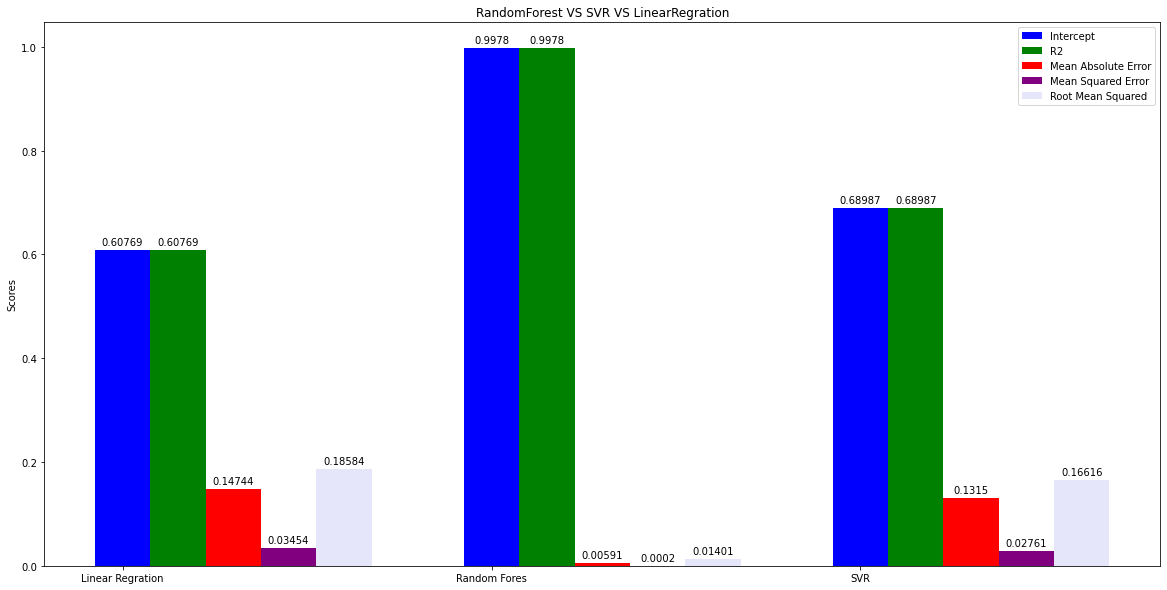

In [184]:
plot_results('RandomForest VS SVR VS LinearRegration',machine)